In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('diabetes_csv.csv')

In [3]:
df.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

#### 1. 1. Load data in Pandas.

In [4]:
df.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

#### 1. 2. Drop columns that aren’t useful.

In [5]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [6]:
df = df.drop(df['Glucose'])

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#### 1. 3. Drop rows with missing values.

df.dropna(axis=0)

#### 1. 4. Create dummy variables.

In [8]:
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [9]:
outcomes = ['Outcome']

In [10]:
X = df[features]
y = df[outcomes]

In [11]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [12]:
y.columns

Index(['Outcome'], dtype='object')

#### 1. 5. Take care of missing data.

In [13]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
X=X.fillna(0)

#### 1.6 Convert the data frame to NumPy.

In [15]:
ser = np.array(df, dtype='int32')

In [16]:
ser

array([[  1,  85,  66, ...,   0,  31,   0],
       [  8, 183,  64, ...,   0,  32,   1],
       [  1,  89,  66, ...,   0,  21,   0],
       ...,
       [  5, 121,  72, ...,   0,  30,   0],
       [  1, 126,  60, ...,   0,  47,   1],
       [  1,  93,  70, ...,   0,  23,   0]], dtype=int32)

In [17]:
ser.shape

(632, 9)

In [18]:
print(ser.dtype)
print(type(ser))

int32
<class 'numpy.ndarray'>


#### 1. 7. Divide the data set into training data and test data.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

In [21]:
X_train.shape

(600, 8)

In [22]:
y_train.shape

(600, 1)

### 2. a.  Construct a CSV file with the following attributes:
Study time in hours of ML lab course (x)
Score out of 10 (y)
The dataset should contain 10 rows.

In [23]:

# initialize data of lists.
data = {'Hours': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
        'Score': [1, 2, 3,4, 5, 6, 7, 8, 9, 10]}

df.to_csv('created.csv')

# Create DataFrame
df = pd.DataFrame(data)
X = df['Hours']
y = df['Score']

# Print the output.
print(df)

   Hours  Score
0      2      1
1      4      2
2      6      3
3      8      4
4     10      5
5     12      6
6     14      7
7     16      8
8     18      9
9     20     10


#### b. Create a regression model and display the following:
Coefficients: B0 (intercept) and B1 (slope)

RMSE (Root Mean Square Error)

Predicted responses

In [24]:
def linear_regression(X, Y):
    n = len(X)
    
    # Calculate means
    mean_X = sum(X) / n
    mean_Y = sum(Y) / n
    
    # Calculate the slope (b) and intercept (a)
    numerator = sum((X[i] - mean_X) * (Y[i] - mean_Y) for i in range(n))
    denominator = sum((X[i] - mean_X) ** 2 for i in range(n))
    
    num=0
    den = 0
    for i in range(n):
        num+=(X[i] - mean_X)*(Y[i] - mean_Y) 
        den+=(X[i]-mean_X)**2
    
#     b = numerator / denominator
#     a = mean_Y - b * mean_X
    
    
    #eqn : y = a0 + a1.x

    a1 = num/den
    a0 = mean_Y - (a1*mean_X)
    
    return a0, a1

a, b = linear_regression(X, y)
print("Intercept (a):", a)
print("Slope (b):", b)


Intercept (a): 0.0
Slope (b): 0.5


In [25]:
#linear model eqn: y = a0 + a1*x => y = 0 + 0.5*x

In [26]:
def getPredictions(a, b, X_vals, y_vals):
    for x in X_vals:
        y = a + (b*x)
        y_vals.append(y)
        

In [27]:
x_test = X
y_test = []
getPredictions(a,b,x_test, y_test)
print("predict y: ")
print(y_test)
print("actual y: ")
print(df['Score'])


def getError(y_test, y_train):
        err = 0
        for i in range(len(y_test)):
            err = err + (y_train[i] - y_test[i])**2
        err = err**0.5
        print ("error: ", err)

getError(y_test, df['Score'] )

predict y: 
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
actual y: 
0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Score, dtype: int64
error:  0.0


In [28]:
x_test = [2,4,6,7,9,10]
y_test = []
for x in x_test:
    y = a + (b*x)
    y_test.append(y)
print("predicted: ")
print((x_test))
print((y_test))

predicted: 
[2, 4, 6, 7, 9, 10]
[1.0, 2.0, 3.0, 3.5, 4.5, 5.0]


In [29]:
#### plotting input data on scatter plot

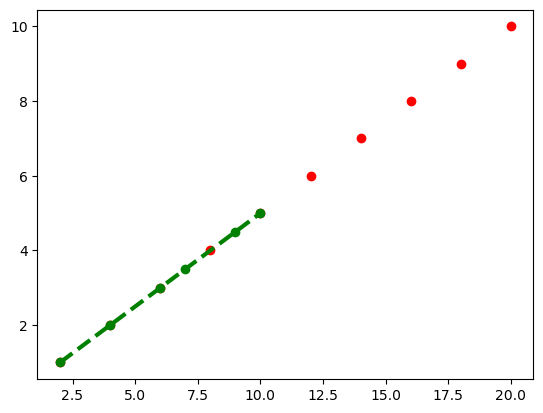

In [30]:
import matplotlib.pyplot as plt
plt.plot(df['Hours'], df['Score'], 'ro')
plt.plot(x_test, y_test, 'g', linestyle='dashed', marker='o', linewidth=3)
plt.show()

#### rmse

#### Create a scatter plot of the data points in red color and plot the graph of x vs. predicted y in blue color.

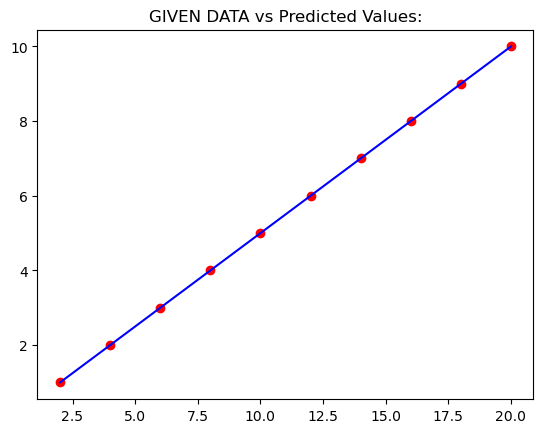

In [32]:
plt.plot(df['Hours'],df['Score'], 'ro')
plt.title("GIVEN DATA vs Predicted Values:")
plt.plot(df['Hours'], df['Score'], 'b')
plt.show()

#### Calculus Method

In [33]:
import numpy as np

np.random.seed(0)  # For reproducibility
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

X_b = np.c_[np.ones((100, 1)), X]

theta = np.random.randn(2, 1)  # Random initialization

learning_rate = 0.01
n_iterations = 1000
m = len(X_b)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients

print("Estimated coefficients:")
print(f"Intercept (beta_0): {theta[0][0]}")
print(f"Slope (beta_1): {theta[1][0]}")

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  
y_predict = X_new_b.dot(theta)

print("Predictions:")
print(y_predict)


Estimated coefficients:
Intercept (beta_0): 4.20607718142562
Slope (beta_1): 2.9827303563323175
Predictions:
[[ 4.20607718]
 [10.17153789]]


#### 2. e. Compare the coefficients obtained using both methods and compare them with the analytical solution.

In [34]:
print('difference bw intercepts: ')
print(theta[0][0] - a)

difference bw intercepts: 
4.20607718142562


In [35]:
print('diff bw slopes: ')
print(theta[1][0] - b)

diff bw slopes: 
2.4827303563323175


#### 2. f. Test your model to predict the score obtained when the study time of a student is 10 hours.

In [ ]:
test_x = 10
test_y = a + (b*test_x)
print(f'predicted value for x = {test_x} is',test_y)